In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#from google.colab import files
#uploaded = files.upload()

insurance_data = pd.read_csv('F:\Great Learning\Projects\Statistical Learning\Project 2 Statistical Learning\insurance.csv')

# Checking the shape of data
insurance_data.shape

(1338, 7)

In [4]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
# Checking any null/nan values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

 From above we can say that No nan/null values present in data

In [8]:
insurance_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


In [9]:
# printing head and tail of the data

insurance_data.iloc[np.r_[0:5,-5:0]]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [10]:
# checking unique values of the categorical columns

print('for smoker = ', insurance_data['smoker'].unique())
print('for sex    = ', insurance_data['sex'].unique())
print('for region = ', insurance_data['region'].unique())

for smoker =  ['yes' 'no']
for sex    =  ['female' 'male']
for region =  ['southwest' 'southeast' 'northwest' 'northeast']


In [15]:
# dealing with categorical data
from sklearn.preprocessing import LabelEncoder

# Firstly keeping original data in new variable in case we need in future
original_insurance_data = insurance_data.copy()

# object creation of class LabelEncoder
label_encoder = LabelEncoder()

# fitting data and transforming the categorical data
label_encoder.fit(insurance_data['sex'])
insurance_data['sex'] = label_encoder.transform(insurance_data['sex'])

label_encoder.fit(insurance_data['smoker'])
insurance_data['smoker'] = label_encoder.transform(insurance_data['smoker'])

label_encoder.fit(insurance_data['region'])
insurance_data['region'] = label_encoder.transform(insurance_data['region'])

# Just for check the data is encoded for all the rows
insurance_data.sample(5)

,age,sex,bmi,children,smoker,region,charges
712,43,0,30.685,2,0,1,8310.83915
724,50,0,27.075,1,0,0,10106.13425
1329,52,1,38.600,2,0,3,10325.20600
107,26,1,30.875,2,0,1,3877.30425
453,20,1,29.735,0,0,1,1769.53165


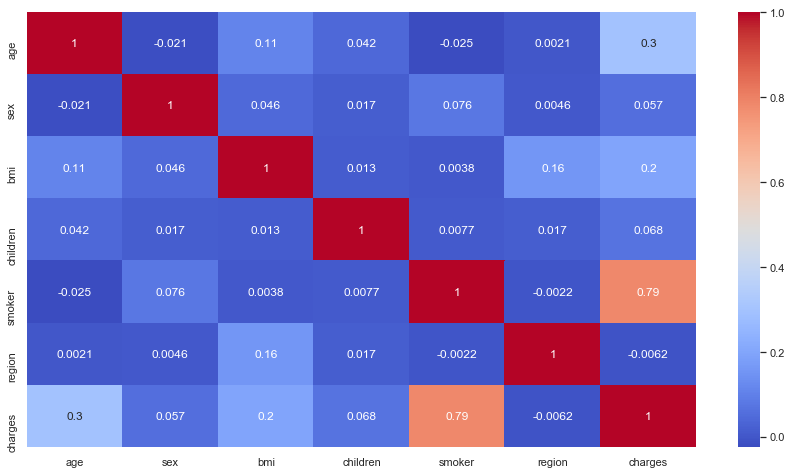

In [17]:
#Checking for correlation between the columns
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(insurance_data.corr(), annot=True, cmap='coolwarm');

From above heat map we can say that smoker have high correlation with charges i.e. A strong correlation is observed only with smoking patient

In [18]:
#checking the variance if variance is less than 0.1 or any column then it will have almost no influence on classification

insurance_data.var() < 0.1

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

No column have var less than 0.1

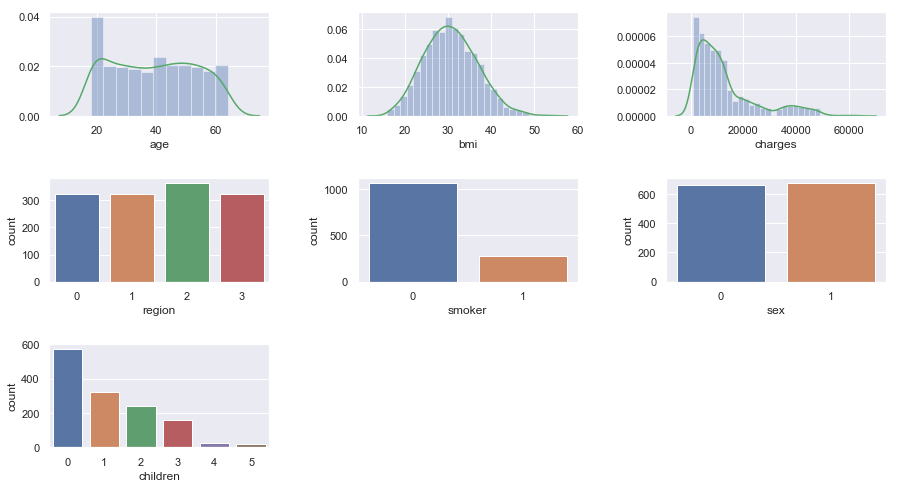

In [19]:
#univariate analysis

sns.set(rc={'figure.figsize':(15,8)})
plt.subplots_adjust(hspace=0.6, wspace=0.4)
sns.distplot(a=insurance_data['age'], kde_kws={ "color":'g'}, axlabel='age', ax=plt.subplot(3,3,1))
sns.distplot(a=insurance_data['bmi'], kde_kws={ "color":'g'}, axlabel='bmi', ax=plt.subplot(3,3,2))
sns.distplot(a=insurance_data['charges'], kde_kws={ "color":'g'}, axlabel='charges', ax=plt.subplot(3,3,3))
sns.countplot(x=insurance_data['region'], ax=plt.subplot(3,3,4))
sns.countplot(x=insurance_data['smoker'], ax=plt.subplot(3,3,5))
sns.countplot(x=insurance_data['sex'], ax=plt.subplot(3,3,6));
sns.countplot(x=insurance_data['children'], ax=plt.subplot(3,3,7));

Initial analysis on the basis of above:
- The charges distribution is skewed to the left
- number of non smoker are more
- bmi is similar to normal distribution
- Age distribution is uniform, except for ages below 25 where the histogram peaks

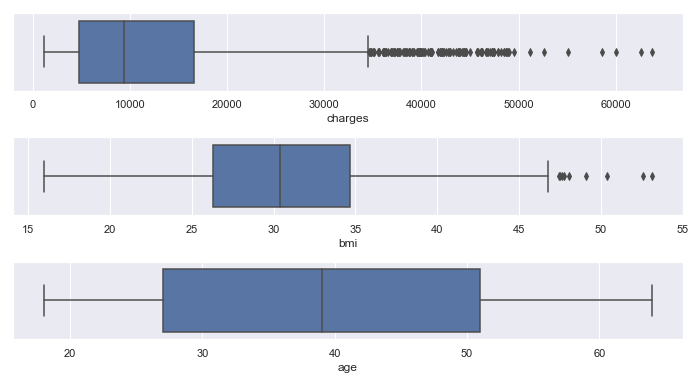

In [20]:
sns.set(rc={'figure.figsize':(12,6)})
plt.subplots_adjust(hspace=0.6, wspace=0.4)
# Checking any outliers
sns.boxplot(insurance_data['charges'], ax=plt.subplot(3,1,1))
sns.boxplot(insurance_data['bmi'], ax=plt.subplot(3,1,2))
sns.boxplot(insurance_data['age'], ax=plt.subplot(3,1,3));


From the above box plots we can say that there are ouliers in charges and bmi

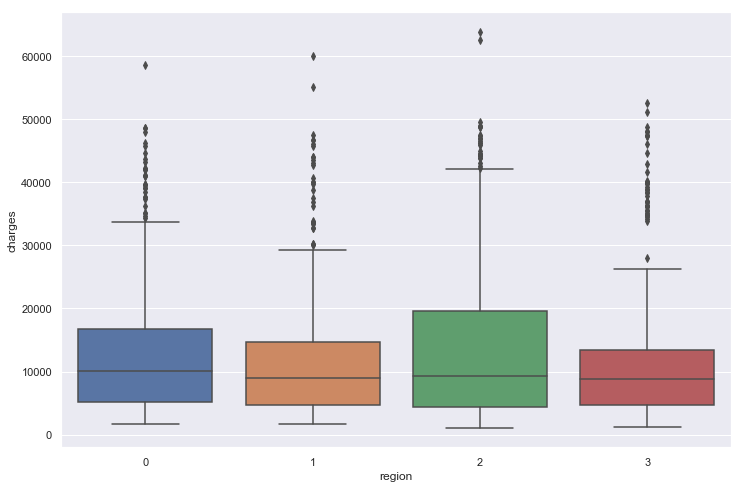

In [21]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=insurance_data, y='charges', x='region')

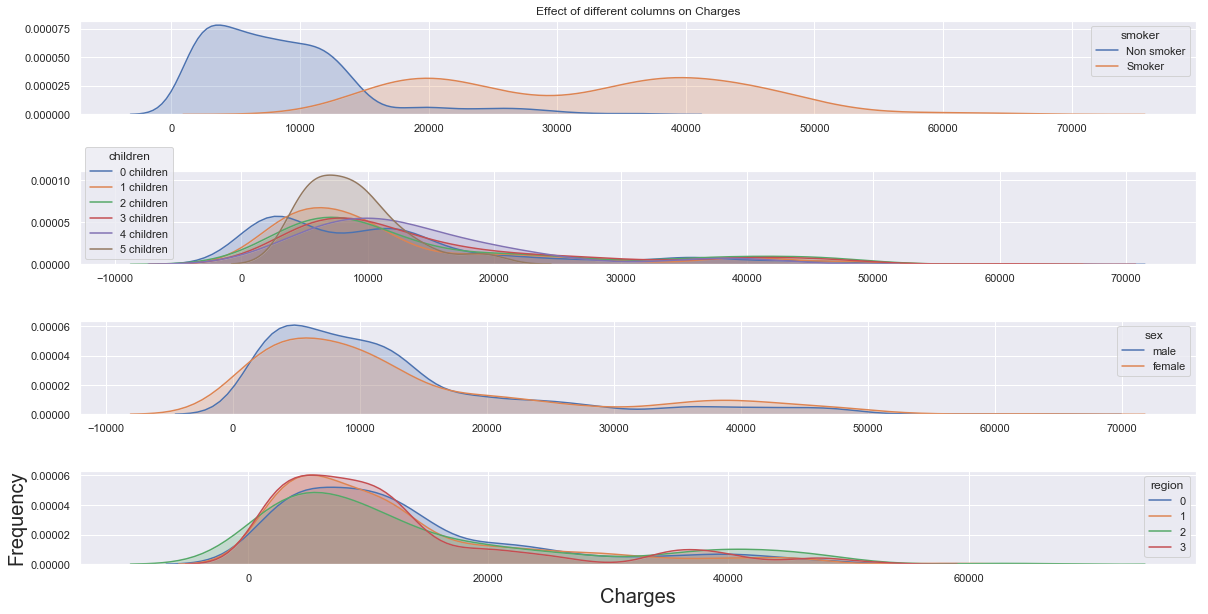

In [22]:
import warnings 
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(20,10)})
plt.subplots_adjust(hspace=0.6, wspace=0.4)

sns.kdeplot(insurance_data[insurance_data['smoker'] == 0]['charges'], ax=plt.subplot(4,1,1), shade=True, label='Non smoker')
sns.kdeplot(insurance_data[insurance_data['smoker'] == 1]['charges'], ax=plt.subplot(4,1,1), shade=True, label='Smoker')
plt.subplot(4,1,1).legend(title='smoker')
plt.title('Effect of different columns on Charges')

sns.kdeplot(insurance_data.loc[insurance_data["children"] == 0]["charges"], ax=plt.subplot(4,1,2), shade=True, label="0 children")
sns.kdeplot(insurance_data.loc[insurance_data["children"] == 1]["charges"], ax=plt.subplot(4,1,2), shade=True, label="1 children")
sns.kdeplot(insurance_data.loc[insurance_data["children"] == 2]["charges"], ax=plt.subplot(4,1,2), shade=True, label="2 children")
sns.kdeplot(insurance_data.loc[insurance_data["children"] == 3]["charges"], ax=plt.subplot(4,1,2), shade=True, label="3 children")
sns.kdeplot(insurance_data.loc[insurance_data["children"] == 4]["charges"], ax=plt.subplot(4,1,2), shade=True, label="4 children")
sns.kdeplot(insurance_data.loc[insurance_data["children"] == 5]["charges"], ax=plt.subplot(4,1,2), shade=True, label="5 children")
plt.subplot(4,1,2).legend(title='children')

sns.kdeplot(insurance_data.loc[insurance_data["sex"] == 0]["charges"], ax=plt.subplot(4,1,3), shade=True, label="male")
sns.kdeplot(insurance_data.loc[insurance_data["sex"] == 1]["charges"], ax=plt.subplot(4,1,3), shade=True, label="female")
plt.subplot(4,1,3).legend(title='sex')

sns.kdeplot(insurance_data.loc[insurance_data["region"] == 0]["charges"], ax=plt.subplot(4,1,4), shade=True, label="0")
sns.kdeplot(insurance_data.loc[insurance_data["region"] == 1]["charges"], ax=plt.subplot(4,1,4), shade=True, label="1")
sns.kdeplot(insurance_data.loc[insurance_data["region"] == 2]["charges"], ax=plt.subplot(4,1,4), shade=True, label="2")
sns.kdeplot(insurance_data.loc[insurance_data["region"] == 3]["charges"], ax=plt.subplot(4,1,4), shade=True, label="3")
ax=plt.subplot(4,1,4).legend(title='region')

plt.xlabel("Charges", fontsize=20)
plt.ylabel("Frequency", fontsize=20);

From distributions we can roughly say only Smokers makes a significant difference in cost, and hence is an important feature

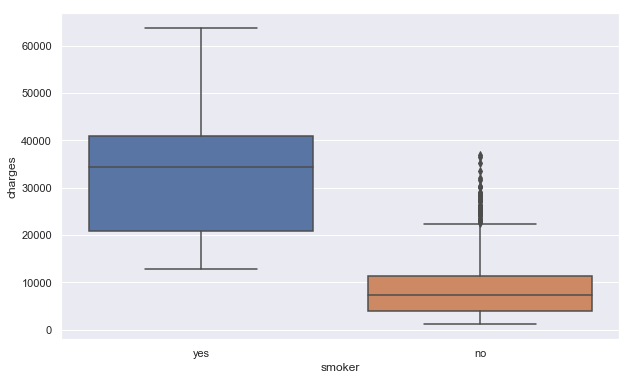

In [23]:
# Checking the outliers group manner
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data=original_insurance_data, y='charges', x='smoker')

From the above bar graph, we can observe the following:
*   smokers have higher spread across the charges
*   No. of outlier's are more in non smoking group of people



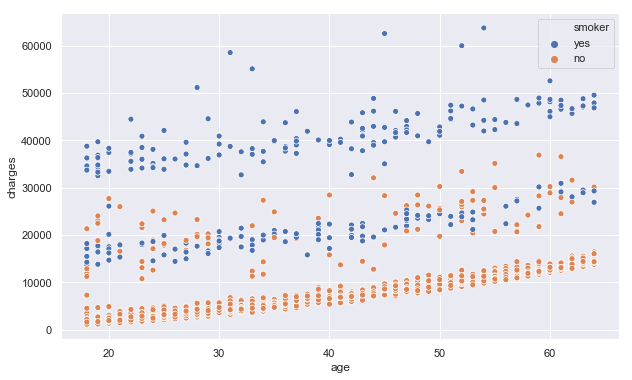

In [24]:
sns.scatterplot(data=original_insurance_data, x='age', y='charges', hue='smoker')

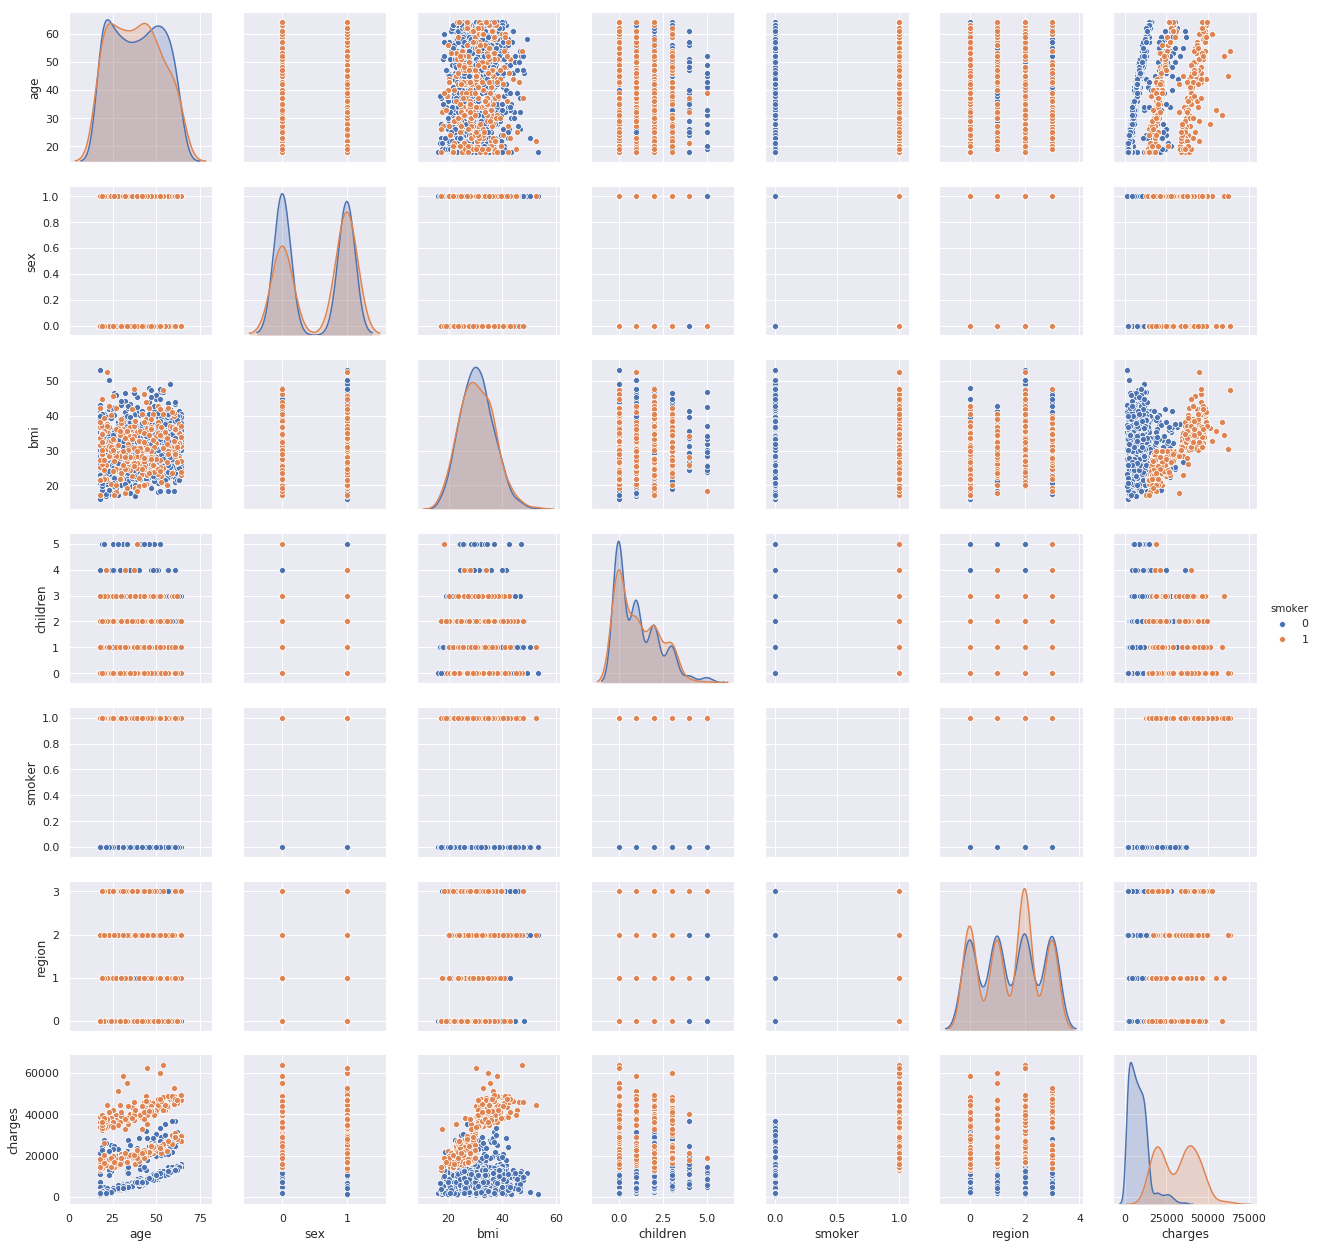

In [55]:
sns.pairplot(data=insurance_data, diag_kind='kde',hue='smoker')

some points which can be seen from pair plots:
- higher charges are associated with smokers of older age i.e. older the smoker gets more complicated the health and it results in higher charges.
- higher charges are slightly associated with smokers with higher bmi. higher bmi of the smoker, more prone to have higher charges
- Higher charges are associated with males
- For region and number of children, there is no clear association of charges. **Low correlation**

In [25]:
from scipy import stats 

Now let's try to find statistical evidences

Ques 4.

**4.a. Do charges of people who smoke differ significantly from the people who don't?**

Let have following hypothesis:
- Null hypothesis: charges of people who smoke do not differ significantly from the people who don't. Mu = 0
- Alternative : charges of people who smoke differ significantly from the people who don't. Mu > 0

In [26]:
# Let's check mean and variance for both the samples

print('Mean, standard deviation and variance for non smoker: %3.2f %3.2f and %3.2f' %(np.mean(insurance_data[insurance_data['smoker']==0]['charges']), np.std(insurance_data[insurance_data['smoker']==0]['charges']), np.var(insurance_data[insurance_data['smoker']==0]['charges'])))
print('Mean, standard deviation and variance for smoker: %3.2f, %3.2f and %3.2f' %(np.mean(insurance_data[insurance_data['smoker']==1]['charges']), np.std(insurance_data[insurance_data['smoker']==1]['charges']), np.var(insurance_data[insurance_data['smoker']==1]['charges'])))

Mean, standard deviation and variance for non smoker: 8434.27 5990.96 and 35891656.00
Mean, standard deviation and variance for smoker: 32050.23, 11520.47 and 132721153.14


In [27]:
# Let's try the problem with 2 sample test 

tstatistic, pval =stats.ttest_ind(insurance_data[insurance_data['smoker']==0]['charges'], insurance_data[insurance_data['smoker']==1]['charges'], equal_var='False')

print("p-value = ", pval)

if(pval < 0.05):
    print("\n AS per the 2 sample test, Null hypothesis is rejected i.e. charges of people who smoke differ significantly from the people who don't.")
else:
    print("\n AS per the 2 sample test, we Failed to reject Null Hypothesis i.e. charges of people who smoke do not differ significantly from the people who don't.")

p-value =  8.271435842177219e-283

 AS per the 2 sample test, Null hypothesis is rejected i.e. charges of people who smoke differ significantly from the people who don't.


In [28]:
# Let's try to use ANOVA (one sided)also 
# It's recommended to use ANOVA if we have more than two sample.But it work on the two sample as well.

tstatistic, pval =stats.f_oneway(insurance_data[insurance_data['smoker']==0]['charges'], insurance_data[insurance_data['smoker']==1]['charges'])

print("p-value = ", pval)

if(pval < 0.05):
  print("\n AS per the ANOVA test, Null hypothesis is rejected i.e. charges of people who smoke differ significantly from the people who don't.")
else:
  print("\n AS per the ANOVA test, we Failed to reject Null Hypothesis i.e. charges of people who smoke do not differ significantly from the people who don't.")

p-value =  8.271435842182967e-283

 AS per the ANOVA test, Null hypothesis is rejected i.e. charges of people who smoke differ significantly from the people who don't.


This is same we visualized using plots.

**4.b. Does bmi of males differ significantly from that of females?**

Let have following hypothesis:

- Null hypothesis: bmi of males do not differ significantly from that of females. Mu = 0
- Alternative : bmi of males differ significantly from that of females. Mu > 0

In [29]:
# two sample test 
tstatistic, pval =stats.ttest_ind(insurance_data[insurance_data['sex']==0]['bmi'], insurance_data[insurance_data['sex']==1]['bmi'])

print("p-value = ", pval)

if(pval < 0.05):
    print("\nAs per the 2 sample test, Null hypothesis is rejected i.e. bmi of males differ significantly from that of females.")
else:
    print("\nAs per the 2 sample test, Failed to reject Null Hypothesis i.e. bmi of males do not differ significantly from that of females")

p-value =  0.08997637178984932

As per the 2 sample test, Failed to reject Null Hypothesis i.e. bmi of males do not differ significantly from that of females


This is same we visualized using plots.

**4.c. Is the proportion of smokers significantly different in different genders?**

Let have following hypothesis:

- Null hypothesis: proportion of smokers do not significantly different in different genders. Mu = 0
- Alternative : proportion of smokers significantly different in different genders. Mu > 0

In [30]:
#  as we have all the data in numeric form --> two sample test

smoker_male = insurance_data[(insurance_data['smoker']==0) & (insurance_data['sex']==1)]['sex']
smoker_female = insurance_data[(insurance_data['smoker']==0) & (insurance_data['sex']==0)]['sex']
tstatistic, pval = stats.ttest_ind(smoker_female, smoker_male)

print("p-value = ", pval)

if(pval < 0.05):
    print("\nAs per the 2 sample test, Null hypothesis is rejected i.e. proportion of smokers significantly different in different genders")
else:
    print("\nAs per the 2 sample test, Failed to reject Null Hypothesis i.e. proportion of smokers do not significantly different in different genders.")

p-value =  0.0

As per the 2 sample test, Null hypothesis is rejected i.e. proportion of smokers significantly different in different genders


In [31]:
# using original dataset(without converting the data) and using chisquare to check is above two sample correct
statistic, pval_chi = stats.chisquare(original_insurance_data[original_insurance_data['smoker']=='yes']["sex"].value_counts())

print("p-value = ", pval_chi)

if(pval_chi < 0.05):
    print("\nAs per the chisquare test, Null hypothesis is rejected i.e. proportion of smokers significantly different in different genders")
else:
    print("\nAs per the chisquare test, Failed to reject Null Hypothesis i.e. proportion of smokers do not significantly different in different genders.")

p-value =  0.007857389588994759

As per the chisquare test, Null hypothesis is rejected i.e. proportion of smokers significantly different in different genders


From above two demontration we can say it's better to use chisquare for hypothesis testing on categorical data.

**4.d. Is the distribution of bmi across women with no children, one child and two children, the same ?**

- Null hypothesis: distribution of bmi across women with no children, one child and two children is same
- Alternate hypothesis: distribution of bmi across women with no children, one child and two children is not same

In [32]:
# bmi of women with 0 children
women_bmi_zero_child = original_insurance_data[(original_insurance_data['sex']=='female')&(original_insurance_data['children'] == 0)]['bmi']

# bmi of women with 1 children
women_bmi_one_child = original_insurance_data[(original_insurance_data['sex']=='female')&(original_insurance_data['children'] == 1)]['bmi']

# bmi of women with 0 children
women_bmi_two_child = original_insurance_data[(original_insurance_data['sex']=='female')&(original_insurance_data['children'] == 2)]['bmi']

# since we have three sample using one way ANOVA
tstatistic, pval =stats.f_oneway(women_bmi_zero_child, women_bmi_one_child, women_bmi_two_child)
print("statics", tstatistic)
print("p-value = ", pval)

if(pval < 0.05):
    print("\n AS per the ANOVA test, Null hypothesis is rejected i.e. distribution of bmi across women with no children, one child and two children is not same.")
else:
    print("\n AS per the ANOVA test, Failed to reject Null Hypothesis i.e. distribution of bmi across women with no children, one child and two children is same.")

statics nan
p-value =  nan

 AS per the ANOVA test, Failed to reject Null Hypothesis i.e. distribution of bmi across women with no children, one child and two children is same.
